## 1. Explorar las ofertas relámpago, ¿qué insights puedes generar?


#### IMPORTACIÓN DEL DATASET

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargo el archivo CSV
ofertas = pd.read_csv(r'C:\Users\sfaija\Challenge_Data_Science\ofertas_relampago.csv')

# Muestro los primeros registros para tener una idea de la estructura del archivo
ofertas.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


Sabiendo que las columnas contienen la siguiente información:

OFFER_START_DATE: Fecha de inicio de la oferta.

OFFER_START_DTTM: Hora de inicio de la oferta.

OFFER_FINISH_DTTM: Hora de finalización de la oferta.

OFFER_TYPE: Tipo de oferta.

INVOLVED_STOCK: Stock involucrado en la oferta.

REMAINING_STOCK_AFTER_END: Stock restante después de que terminó la oferta.

SOLD_AMOUNT: Monto vendido durante la oferta.

SOLD_QUANTITY: Cantidad de unidades vendidas durante la oferta.

ORIGIN: Origen de la oferta.

SHIPPING_PAYMENT_TYPE: Tipo de pago de envío.

DOM_DOMAIN_AGG1: Dominio agregado (categoría).

VERTICAL: Vertical o subcategoría.

DOMAIN_ID: ID del dominio o categoría.

#### ANALISIS DESCRIPTIVO Y REVISIÓN DE NULOS PARA VISUALIZAR LA COMPOSICIÓN DE LOS DATOS 

In [112]:
##Antes de realizar un análisis más profundo, voy a hacer un análisis descriptivo básico para comprender la distribución y calidad de los datos.
# Análisis descriptivo básico
desc = ofertas.describe(include='all')

desc

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
count,48746,48746,48746,48746,48746.000000,48746.000000,24579.000000,24579.000000,11316,48746,48746,48746,48746
unique,61,783,7578,1,NaN,NaN,NaN,NaN,1,2,36,9,1266
top,2021-07-30,2021-07-30 13:00:00+00:00,2021-07-06 13:00:01+00:00,lightning_deal,NaN,NaN,NaN,NaN,A,free_shipping,HOME&DECOR,APP & SPORTS,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
freq,1300,414,77,48746,NaN,NaN,NaN,NaN,11316,26658,6742,13241,1759
mean,NaN,NaN,NaN,NaN,35.007508,30.565216,51.208898,10.851052,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,206.761058,195.813806,175.254414,45.475305,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,-192.000000,0.280000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,4.000000,5.730000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,10.000000,8.000000,12.420000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,15.000000,15.000000,30.925000,6.000000,NaN,NaN,NaN,NaN,NaN


In [113]:
# Información sobre valores nulos
null_values = ofertas.isnull().sum()

null_values

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

In [114]:
# Obtén los tipos de datos de cada columna
tipos_de_datos = ofertas.dtypes
print(tipos_de_datos)

OFFER_START_DATE              object
OFFER_START_DTTM              object
OFFER_FINISH_DTTM             object
OFFER_TYPE                    object
INVOLVED_STOCK                 int64
REMAINING_STOCK_AFTER_END      int64
SOLD_AMOUNT                  float64
SOLD_QUANTITY                float64
ORIGIN                        object
SHIPPING_PAYMENT_TYPE         object
DOM_DOMAIN_AGG1               object
VERTICAL                      object
DOMAIN_ID                     object
dtype: object


Contamos con 48746 registros en total, de los cuales 3 columnas (SOLD_AMOUNT, SOLD_QUANTITY y ORIGIN) cuentan con algunos datos nulos. SOLD_AMOUNT y SOLD_QUANTITY al ser datos referidos a cantidades, realizaré el reemplazo de valor 0 cuando figura null.
En el caso de ORIGIN no realizaré nada por el momento salvo que visualice en el trascurso del trabajo la necesidad.

Para las primeras 3 columnas que son datos referidos a fechas, se encuentran em formato "object". Voy a convertirlas en datetime con el fin de poder realizar operaciones y analisis de series de tiempo de manera mas eficiente.

In [115]:
# Reemplazar los valores nulos en las columnas 'SOLD_AMOUNT', 'SOLD_QUANTITY' y 'ORIGIN' con 0
ofertas['SOLD_AMOUNT'].fillna(0, inplace=True)
ofertas['SOLD_QUANTITY'].fillna(0, inplace=True)
ofertas['ORIGIN'].fillna(0, inplace=True)

# Verifico si las columnas tienen registros nulos
columnas_con_nulos = ofertas[['SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN']].isnull().sum()

# Muestra la cantidad de registros nulos en cada columna
print(columnas_con_nulos)

SOLD_AMOUNT      0
SOLD_QUANTITY    0
ORIGIN           0
dtype: int64


In [116]:
ofertas['OFFER_START_DATE'] = pd.to_datetime(ofertas['OFFER_START_DATE'], format='%Y-%m-%d')
ofertas['OFFER_START_DTTM'] = pd.to_datetime(ofertas['OFFER_START_DTTM'], format='%Y-%m-%d')
ofertas['OFFER_FINISH_DTTM'] = pd.to_datetime(ofertas['OFFER_FINISH_DTTM'], format='%Y-%m-%d')

tipos_de_datos = ofertas.dtypes
print(tipos_de_datos)

OFFER_START_DATE                  datetime64[ns]
OFFER_START_DTTM             datetime64[ns, UTC]
OFFER_FINISH_DTTM            datetime64[ns, UTC]
OFFER_TYPE                                object
INVOLVED_STOCK                             int64
REMAINING_STOCK_AFTER_END                  int64
SOLD_AMOUNT                              float64
SOLD_QUANTITY                            float64
ORIGIN                                    object
SHIPPING_PAYMENT_TYPE                     object
DOM_DOMAIN_AGG1                           object
VERTICAL                                  object
DOMAIN_ID                                 object
dtype: object


## 1) Análisis de Stock Involucrado:

Preguntas:
¿Cuanto stock suele participar en las ofertas relámpagos? 

C:\Users\sfaija\Anaconda3\lib\site-packages\seaborn\distributions.py:459: RuntimeWarning: invalid value encountered in multiply
  edges = edges[:-1] + (1 - shrink) / 2 * orig_widths


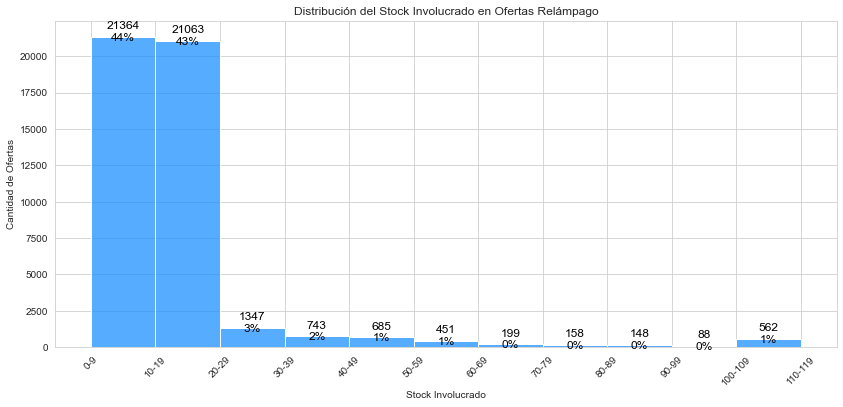

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Definir los límites de los rangos
rangos = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, float('inf')]

# Histograma con los rangos especificados
ax = sns.histplot(ofertas['INVOLVED_STOCK'], bins=rangos, color='dodgerblue', kde=False)

# Título y etiquetas de ejes
plt.title('Distribución del Stock Involucrado en Ofertas Relámpago')
plt.xlabel('Stock Involucrado')
plt.ylabel('Cantidad de Ofertas')

# Calcular el total de barras
total_barras = len(ofertas['INVOLVED_STOCK'])

# Aumentar el tamaño de las etiquetas numéricas y agregar el porcentaje sin decimales
for p in ax.patches:
    if p.get_height() > 0:
        height = int(p.get_height())
        porcentaje = (height / total_barras) * 100
        ax.annotate(f'{height}\n{porcentaje:.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Configurar etiquetas del eje x manualmente
x_ticks = [f'{i}-{i+9}' for i in rangos[:-1]]
plt.xticks(rangos[:-1], x_ticks, rotation=45, ha="center")

plt.show()

Verificamos que la gran mayoria de los productos que participaron contaban con poco stock durante el periodo de oferta. 
El 87% de los productos que participaron de la contaron con un stock Menor a 20 unidades. Un 8% se encuentra distribuido entre los intervalos de 20 a 99 y el 5% restante se encuentra entre >=100 unidades 

La gráfica muestra la distribución del stock involucrado en las ofertas relámpago. A continuación detallo algunas observaciones:

La mayoría de las ofertas relámpago involucran un stock pequeño, generalmente menos de 20 unidades.
A medida que el stock involucrado aumenta, la cantidad de ofertas tiende a disminuir.

## 2) Análisis sobre duración en horas de las ofertas:
Pregunta: cuanto es la duración en horas de las ofertas relampagos?

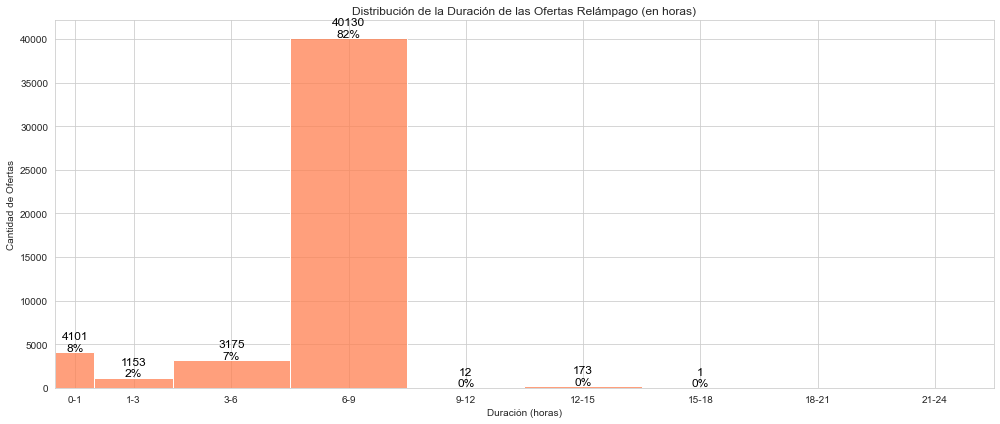

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Definir los límites de los rangos
bins_new_scale = [0, 1, 3, 6, 9, 12, 15, 18, 21, 24]

# Calcula la duración en horas y crea la columna 'DURATION_HOURS'
ofertas['START_TIME'] = pd.to_datetime(ofertas['OFFER_START_DTTM']) 
ofertas['END_TIME'] = pd.to_datetime(ofertas['OFFER_FINISH_DTTM'])
ofertas['DURATION_HOURS'] = (ofertas['END_TIME'] - ofertas['START_TIME']).dt.total_seconds() / 3600.0


# Histograma con los rangos especificados
ax = sns.histplot(ofertas['DURATION_HOURS'], bins=bins_new_scale, color='coral')

# Título y etiquetas de ejes
plt.title('Distribución de la Duración de las Ofertas Relámpago (en horas)')
plt.xlabel('Duración (horas)')
plt.ylabel('Cantidad de Ofertas')
plt.xlim(0, 24)
plt.xticks(ticks=[0.5, 2, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 22.5],
           labels=['0-1', '1-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24'])

# Calcular el total de barras
total_barras = len(ofertas['DURATION_HOURS'])

# Aumentar el tamaño de las etiquetas numéricas y agregar el porcentaje
for p in ax.patches:
    if p.get_height() > 0:
        height = int(p.get_height())
        porcentaje = (height / total_barras) * 100
        ax.annotate(f'{int(p.get_height())}\n{porcentaje:.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),  # Aumentamos el tamaño de fuente aquí
                    textcoords='offset points')

plt.tight_layout()
plt.show()

Verifico que el 99% de las ofertas relámpago tienen una duración de entre 0 y 10 horas. Hay un pico pronunciado en ofertas que duran alrededor de 6 a 9 horas que representa el 82%.
A medida que la duración de la oferta aumenta, la cantidad de ofertas tiende a disminuir.

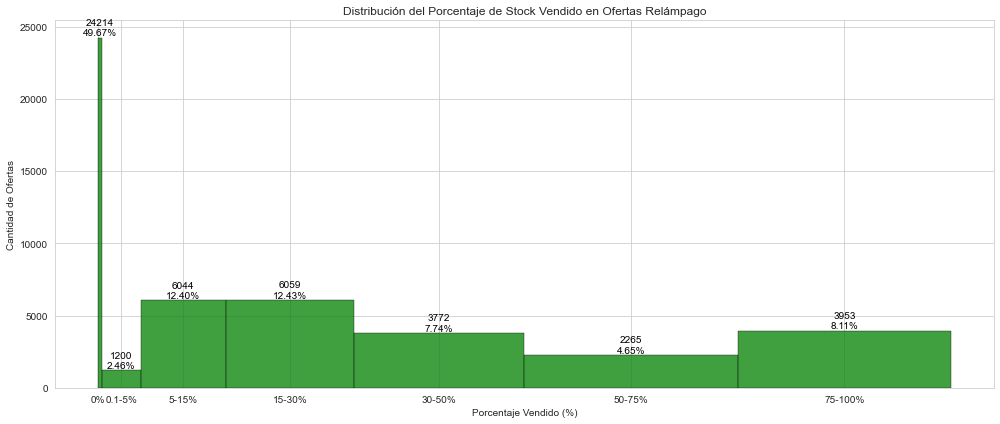

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style('whitegrid')  # Puedes ajustar el estilo según tus preferencias

# Calculamos el porcentaje del stock vendido
ofertas['PERCENTAGE_SOLD'] = (ofertas['SOLD_QUANTITY'] / ofertas['INVOLVED_STOCK']) * 100

# Distribución del porcentaje vendido
plt.figure(figsize=(14, 6))

# Define el rango de bins con intervalos más anchos
bins = [0, 0.5, 5, 15, 30, 50, 75, 100]
ax = sns.histplot(ofertas['PERCENTAGE_SOLD'], bins=bins, color='green', edgecolor='black')

plt.title('Distribución del Porcentaje de Stock Vendido en Ofertas Relámpago')
plt.xlabel('Porcentaje Vendido (%)')
plt.ylabel('Cantidad de Ofertas')

# Calcular el total de barras
total_barras = len(ofertas['PERCENTAGE_SOLD'])

# Configurar etiquetas del eje x manualmente
x_labels = ['0%', '0.1-5%', '5-15%', '15-30%', '30-50%', '50-75%', '75-100%']
plt.xticks([0, 2.75, 10, 22.5, 40, 62.5, 87.5], x_labels)

# Aumentar el tamaño de las etiquetas numéricas y agregar el valor y el porcentaje
for p in ax.patches:
    if p.get_height() > 0:
        valor = int(p.get_height())
        porcentaje = (valor / total_barras) * 100
        ax.annotate(f'{valor}\n{porcentaje:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

La gráfica muestra la distribución del porcentaje de stock vendido durante las ofertas relámpago. 

El 50% de los productos no vendió ninguna unidad (% stock vendido fue 0%) Lo que significa que este tipo de ofertas no ayudó a rotar el producto.

Sin embargo, también hay un pico significativo de ofertas donde se vende el 100% del stock involucrado, lo que indica que estas ofertas fueron totalmente exitosas.
En general, parece haber una distribución bimodal, con picos en ambos extremos: ofertas poco exitosas y ofertas muy exitosas.

La gráfica muestra la distribución del porcentaje de stock vendido durante las ofertas relámpago. A continuación, algunas observaciones:

Una considerable cantidad de ofertas resulta en la venta de un pequeño porcentaje del stock involucrado, con muchos casos en los que prácticamente no se venden unidades.
Sin embargo, también hay un pico significativo de ofertas donde se vende el 100% del stock involucrado, lo que indica que estas ofertas fueron totalmente exitosas.
En general, parece haber una distribución bimodal, con picos en ambos extremos: ofertas poco exitosas y ofertas muy exitosas.

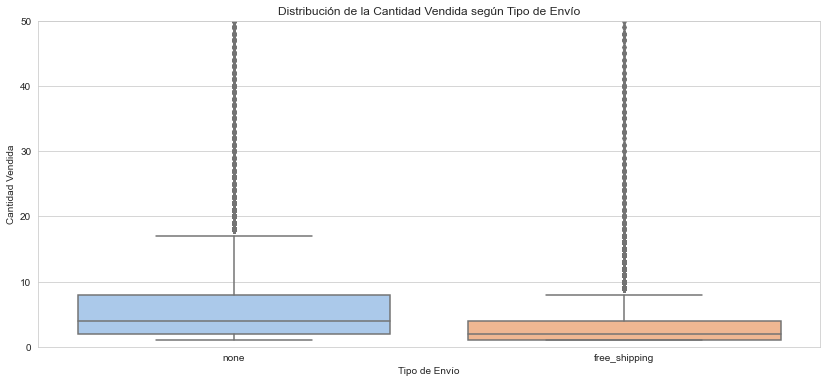

In [36]:
# Comparación de la cantidad vendida según el tipo de envío
plt.figure(figsize=(14, 6))
sns.boxplot(data=ofertas, x='SHIPPING_PAYMENT_TYPE', y='SOLD_QUANTITY', palette='pastel')
plt.title('Distribución de la Cantidad Vendida según Tipo de Envío')
plt.xlabel('Tipo de Envío')
plt.ylabel('Cantidad Vendida')
plt.ylim(0, 50)  # Limitar el eje y para mejor visualización
plt.show()

La gráfica muestra boxplots de la cantidad vendida en función del tipo de envío (gratuito o no). A continuación, algunas observaciones:

Las ofertas con "envío gratuito" tienden a tener una mediana de cantidad vendida más alta en comparación con las ofertas donde el envío no es gratuito.
La dispersión de las ventas es similar entre ambos tipos de envío, pero se observa una mayor cantidad de ofertas con ventas altas (outliers) en el caso de "envío gratuito".
En general, parece que el "envío gratuito" puede tener un impacto positivo en la cantidad vendida durante las ofertas relámpago.

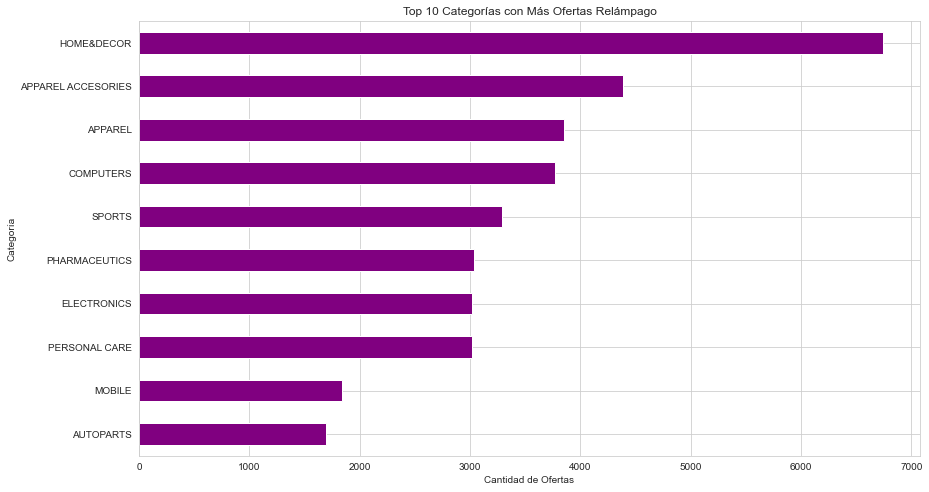

In [37]:
# Top 10 dominios con más ofertas relámpago
top_domains = ofertas['DOM_DOMAIN_AGG1'].value_counts().head(10)

# Gráfica de los dominios con más ofertas
plt.figure(figsize=(14, 8))
top_domains.plot(kind='barh', color='purple')
plt.title('Top 10 Categorías con Más Ofertas Relámpago')
plt.xlabel('Cantidad de Ofertas')
plt.ylabel('Categoría')
plt.gca().invert_yaxis()  # Invertir el eje y para mejor visualización
plt.show()

La gráfica muestra las 10 categorías con la mayor cantidad de ofertas relámpago. Aquí hay algunas observaciones:

"HOME&DECOR" es la categoría con la mayor cantidad de ofertas relámpago, seguida de "APP & SPORTS" y "BEAUTY".
Las demás categorías en el top 10 tienen una cantidad de ofertas más equilibrada.

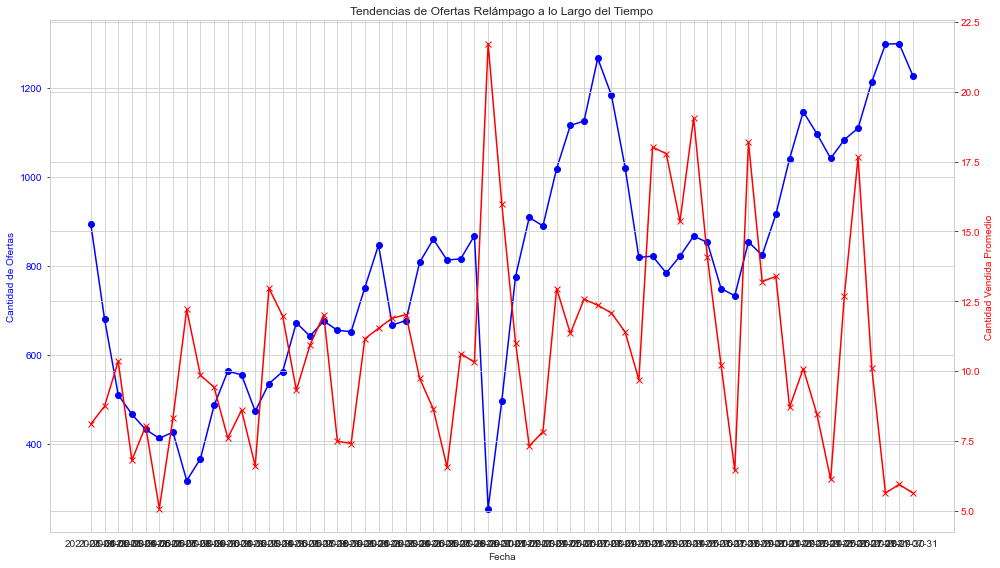

In [38]:
# Agrupamos por fecha y calculamos la cantidad de ofertas y la cantidad vendida promedio por día
trends = ofertas.groupby('OFFER_START_DATE').agg({'OFFER_TYPE': 'count', 'SOLD_QUANTITY': 'mean'}).reset_index()

# Gráficas de tendencias a lo largo del tiempo
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfica para la cantidad de ofertas
ax1.plot(trends['OFFER_START_DATE'], trends['OFFER_TYPE'], color='blue', label='Cantidad de Ofertas', marker='o')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cantidad de Ofertas', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para la cantidad vendida promedio
ax2 = ax1.twinx()
ax2.plot(trends['OFFER_START_DATE'], trends['SOLD_QUANTITY'], color='red', label='Cantidad Vendida Promedio', marker='x')
ax2.set_ylabel('Cantidad Vendida Promedio', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Título y visualización
plt.title('Tendencias de Ofertas Relámpago a lo Largo del Tiempo')
fig.tight_layout()
plt.show()

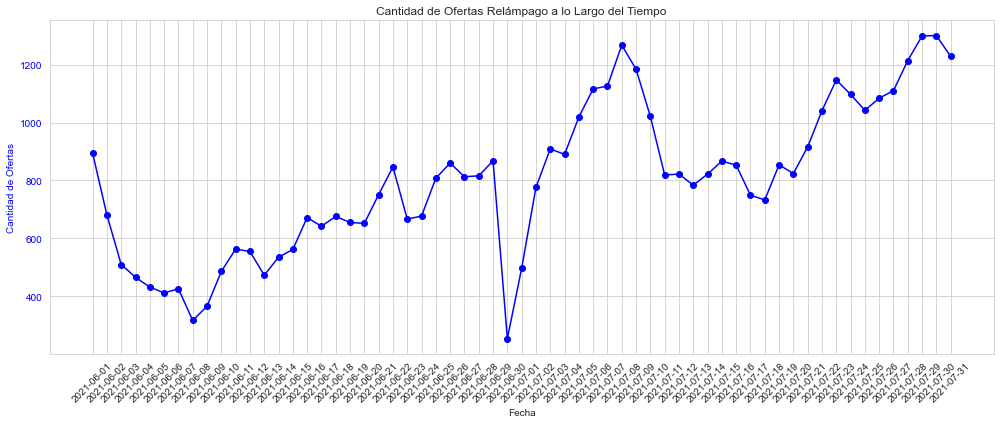

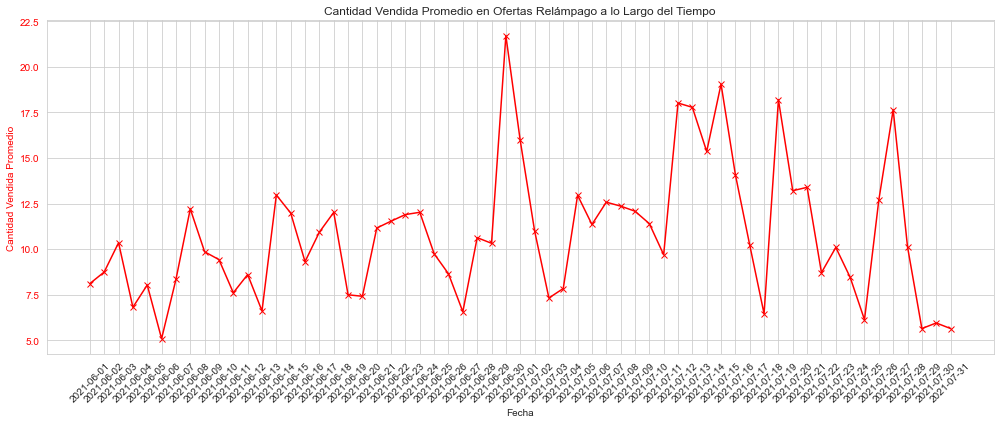

In [43]:
# Ajuste del eje x para una mejor visualización

# Gráfica para la cantidad de ofertas
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(trends['OFFER_START_DATE'], trends['OFFER_TYPE'], color='blue', label='Cantidad de Ofertas', marker='o')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cantidad de Ofertas', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)
plt.title('Cantidad de Ofertas Relámpago a lo Largo del Tiempo')
fig.tight_layout()
plt.show()

# Gráfica para la cantidad vendida promedio
fig, ax2 = plt.subplots(figsize=(14, 6))
ax2.plot(trends['OFFER_START_DATE'], trends['SOLD_QUANTITY'], color='red', label='Cantidad Vendida Promedio', marker='x')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Cantidad Vendida Promedio', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.xticks(rotation=45)
plt.title('Cantidad Vendida Promedio en Ofertas Relámpago a lo Largo del Tiempo')
fig.tight_layout()
plt.show()

La gráfica muestra las tendencias de las ofertas relámpago a lo largo del tiempo en términos de cantidad de ofertas y cantidad vendida promedio por día. Aquí hay algunas observaciones:

Cantidad de Ofertas (línea azul): Se observa una tendencia creciente en la cantidad de ofertas relámpago a lo largo del tiempo, con algunos picos notables en ciertas fechas.
Cantidad Vendida Promedio (línea roja): Aunque hay una tendencia creciente en la cantidad de ofertas, la cantidad vendida promedio por día fluctúa y no muestra un patrón claro. Hay días con un alto promedio de ventas y otros con un promedio más bajo.

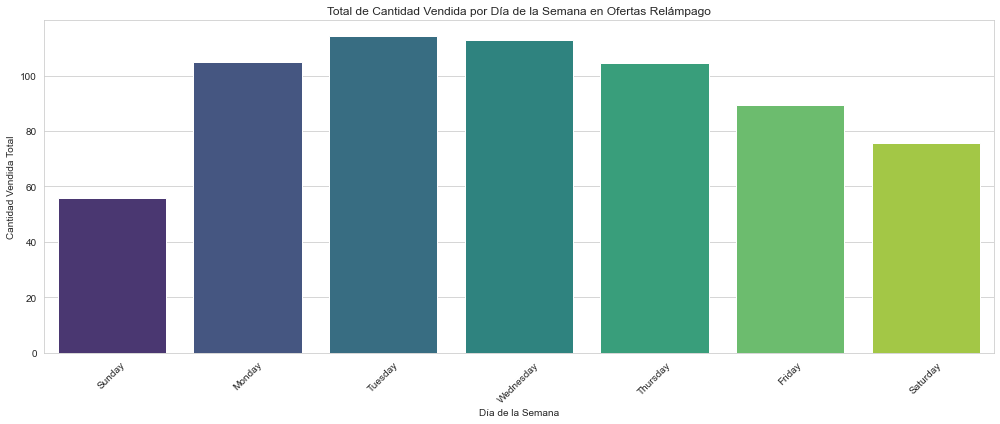

In [54]:
# Ordenar los días de la semana desde el domingo hasta el sábado
order_days_sunday_first = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
trends['DAY_OF_WEEK'] = pd.Categorical(trends['DAY_OF_WEEK'], categories=order_days_sunday_first, ordered=True)

# Agrupar nuevamente por día de la semana y calcular la suma de la cantidad vendida
total_sold_by_day_sunday_first = trends.groupby('DAY_OF_WEEK')['SOLD_QUANTITY'].sum().reset_index()

# Gráfica del total de cantidad vendida por día de la semana con el nuevo orden
plt.figure(figsize=(14, 6))
sns.barplot(x='DAY_OF_WEEK', y='SOLD_QUANTITY', data=total_sold_by_day_sunday_first, palette="viridis", order=order_days_sunday_first)
plt.title('Total de Cantidad Vendida por Día de la Semana en Ofertas Relámpago')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Vendida Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La mayor cantidad de ventas se dieron los dias martes y miercoles